In [97]:
import pandas as pd
import darts.utils.timeseries_generation as timegen
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from darts import TimeSeries
from darts.dataprocessing.transformers.scaler import Scaler
from darts.datasets import ElectricityConsumptionZurichDataset
from darts.models import NHiTSModel

<Axes: xlabel='Timestamp'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


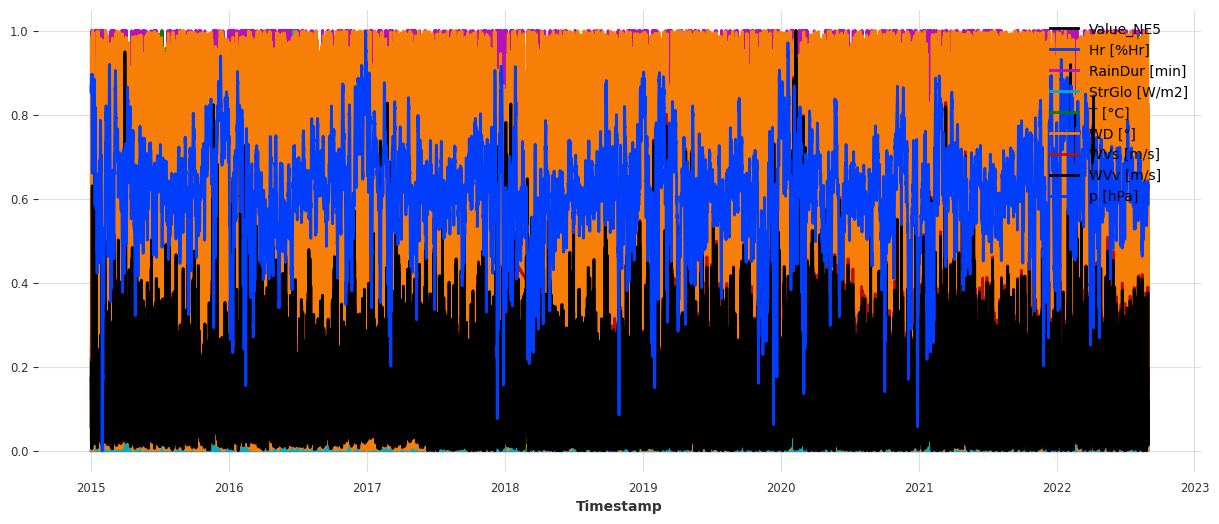

In [105]:
dataset = ElectricityConsumptionZurichDataset().load()
dataset_cov = dataset.copy().drop_columns(["Value_NE5","Value_NE7"])
dataset_NE5 = dataset.drop_columns(["Value_NE7","T [°C]","Hr [%Hr]","RainDur [min]","WD [°]","WVv [m/s]","p [hPa]","WVs [m/s]","StrGlo [W/m2]"])
transformer_data = Scaler()
transformer_cov = Scaler()
dataset_transformed = transformer_data.fit_transform(dataset_NE5)
dataset_cov_transformed = transformer_cov.fit_transform(dataset_cov)
plt.figure(figsize=(15,6))
dataset_transformed.plot()
dataset_cov_transformed.plot()

In [106]:
model = NHiTSModel(input_chunk_length=365, output_chunk_length=100, n_epochs=200)

In [107]:
model.fit(series=dataset_transformed, past_covariates=dataset_cov_transformed, max_samples_per_ts=300)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 5.1 M  | train
-------------------------------------------------------------
3.4 M     Trainable params
1.7 M     Non-trainable params
5.1 M     Total params
20.426    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


NHiTSModel(output_chunk_shift=0, num_stacks=3, num_blocks=1, num_layers=2, layer_widths=512, pooling_kernel_sizes=None, n_freq_downsample=None, dropout=0.1, activation=ReLU, MaxPool1d=True, input_chunk_length=365, output_chunk_length=100, n_epochs=200)

In [108]:
prediction = model.predict(n=100, series=dataset_transformed, past_covariates=dataset_cov_transformed)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [109]:
prediction_rolledback = transformer_data.inverse_transform(prediction)

<Axes: xlabel='Timestamp'>

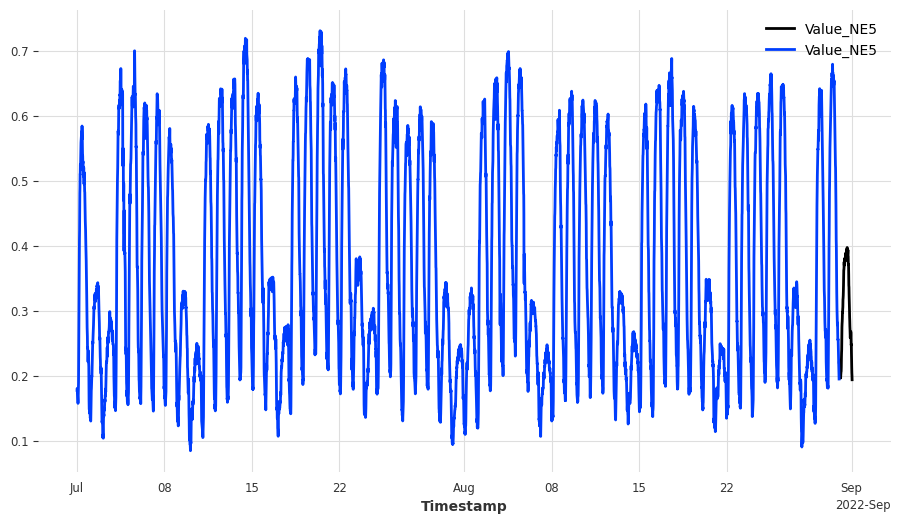

In [110]:
plt.figure(figsize=(11,6))
prediction.plot()
dataset_transformed.drop_before(pd.Timestamp("2022-07-01 00:00:00")).plot()